# –ó–∞–¥–∞–Ω–∏–µ 2

In [1]:
import warnings
warnings.filterwarnings("ignore")

–ü–æ–¥–∫–ª—é—á–∞–µ–º –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, f1_score, confusion_matrix, classification_report, roc_auc_score, ConfusionMatrixDisplay)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from gensim.models import Word2Vec
import pickle
import mlflow
from mlflow.models import infer_signature

–°—á–∏—Ç—ã–≤–∞–µ–º –¥–∞–Ω–Ω—ã–µ –∏ —Ñ–æ—Ä–º–∏—Ä—É–µ–º dataset. –í—ã–≤–æ–¥–∏–º –¥–ª—è –Ω–∞–≥–ª—è–¥–Ω–æ—Å—Ç–∏ –Ω–µ–º–Ω–æ–≥–æ –¥–∞–Ω–Ω—ã—Ö.

In [6]:
dataset = pd.read_csv('dataset.csv')
dataset.head(10)

subject_id  Count_subj  study_id  cart_id  Healthy_Status eeg_time   \
0    19557662          27  40000017  6848296               0   8:44 AM   
1    18477137          93  40000029  6848296               0   9:54 AM   
2    16598616           3  40000035  6376932               1   9:07 AM   
3    16368287           7  40000079  6214760               1   5:14 PM   
4    18370366           2  40000084  6632385               0   1:52 PM   
5    15606157          55  40000089  6632385               0   2:29 PM   
6    12576058          43  40000115  6852956               1  12:54 PM   
7    14691089           1  40000143  6551957               0  10:01 AM   
8    14144725           7  40000144  6924910               0   7:24 AM   
9    16089780           2  40000152  6919786               0  12:35 PM   

    eeg_date                    report_0  \
0  27.06.2015               Sinus rhythm   
1  27.06.2015               Sinus rhythm   
2  28.06.2015          Sinus tachycardia   
3  15.07.2015               Sinus rhythm   
4  27.09.2015               Sinus rhythm   
5  29.10.2013               Sinus rhythm   
6  23.03.2016               Sinus rhythm   
7  10.12.2016               Sinus rhythm   
8  11.12.2011  Sinus rhythm with PAC(s).   
9  13.12.2011               Sinus rhythm   

                                            report_1  \
0                  Possible right atrial abnormality   
1                  Possible right atrial abnormality   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5                                                NaN   
6                                                NaN   
7                 rSr'(V1) - probable normal variant   
8                                                NaN   
9  Extensive T wave changes may be due to myocard...   

                               report_2  ...                    filtering  \
0                                   NaN  ...  60 Hz notch Baseline filter   
1                                   NaN  ...  60 Hz notch Baseline filter   
2            Normal ECG except for rate  ...  60 Hz notch Baseline filter   
3                            Normal ECG  ...  60 Hz notch Baseline filter   
4                                   NaN  ...              <not specified>   
5                                   NaN  ...              <not specified>   
6                            Normal ECG  ...  60 Hz notch Baseline filter   
7  Low QRS voltages in precordial leads  ...  60 Hz notch Baseline filter   
8                        Borderline ECG  ...  60 Hz notch Baseline filter   
9                                   NaN  ...  60 Hz notch Baseline filter   

  rr_interval p_onset  p_end qrs_onset qrs_end t_end p_axis qrs_axis t_axis  
0         659      40    128       170     258   518     81       77     79  
1         722      40    124       162     246   504     77       75     70  
2         600      40    130       162     244   474     79       72     77  
3         659      40    146       180     254   538     79       66     69  
4         659     368  29999       504     590   868     84       80     77  
5         822     365  29999       499     592   852     26       46     30  
6         952      40    146       198     282   598     24       80     20  
7         923      40    140       188     278   594     26       86     13  
8         952      40    180       196     294   610     59      -17      3  
9        1000      40    156       178     274   584      8      -11     19  

[10 rows x 36 columns]

### –ó–∞–¥–∞–Ω–∏–µ 1
–í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–π—Ç–µ —Å –ø–æ–º–æ—â—å—é boxplot –∑–∞–≥—Ä—É–∂–µ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ, –æ–ø–∏—à–∏—Ç–µ –≤–∞—à–∏ –º—ã—Å–ª–∏ –ø–æ –¥–∞–Ω–Ω—ã–º.

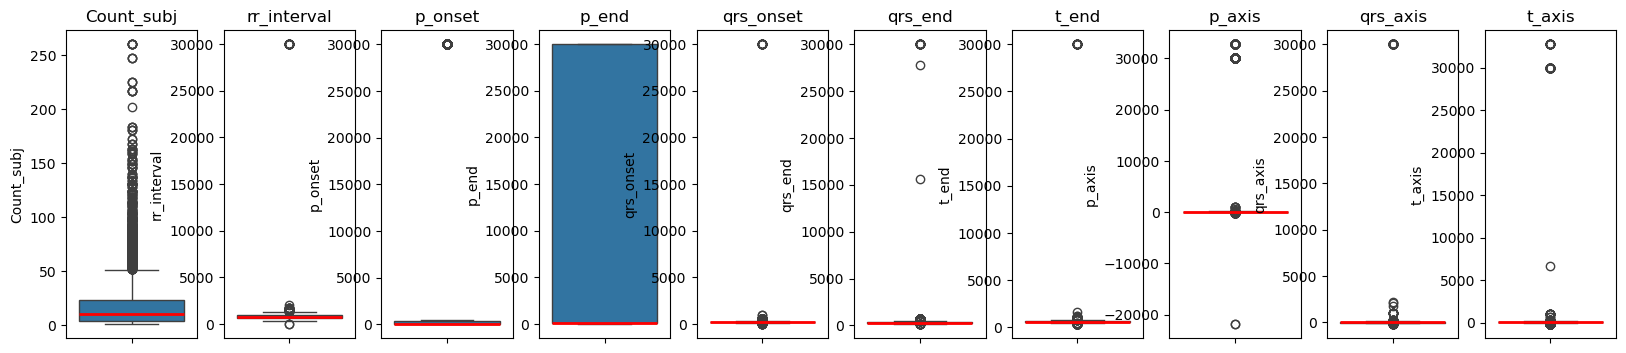

In [10]:
# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
numerical_cols = ['Count_subj', 'rr_interval', 'p_onset', 'p_end', 'qrs_onset', 'qrs_end', 't_end', 'p_axis', 'qrs_axis', 't_axis']
n = len(numerical_cols)
fig,ax = plt.subplots(1,n, figsize=(n*2,4), sharex=True)
for i in range(n):
    index = dataset.columns.get_loc(numerical_cols[i]) # –û—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω–¥–µ–∫—Å
    plt.sca(ax[i])
    col = dataset.columns[index]
    ax[i].set_title(col)
    sns.boxplot(y=dataset.iloc[:,index], data=dataset, medianprops={'color': 'r', 'linewidth': 2})

–û–ø–∏—Å–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö:

- Healthy_Status:
–ë–∏–Ω–∞—Ä–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ (0 –∏–ª–∏ 1), –≥–¥–µ 0 –º–æ–∂–µ—Ç –æ–∑–Ω–∞—á–∞—Ç—å –Ω–∞–ª–∏—á–∏–µ –ø–∞—Ç–æ–ª–æ–≥–∏–∏, –∞ 1 ‚Äî –Ω–æ—Ä–º—É. –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –º–æ–∂–Ω–æ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å —Å –ø–æ–º–æ—â—å—é value_counts().
- –ß–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏:
rr_interval: –ò–Ω—Ç–µ—Ä–≤–∞–ª RR (–≤—Ä–µ–º—è –º–µ–∂–¥—É —Å–µ—Ä–¥–µ—á–Ω—ã–º–∏ —Å–æ–∫—Ä–∞—â–µ–Ω–∏—è–º–∏). –í—ã–±—Ä–æ—Å—ã –º–æ–≥—É—Ç —É–∫–∞–∑—ã–≤–∞—Ç—å –Ω–∞ –∞—Ä–∏—Ç–º–∏–∏.
p_axis, qrs_axis, t_axis: –≠–ª–µ–∫—Ç—Ä–∏—á–µ—Å–∫–∏–µ –æ—Å–∏ —Å–µ—Ä–¥—Ü–∞. –ê–Ω–æ–º–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –º–æ–≥—É—Ç —Å–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤–æ–≤–∞—Ç—å –æ –ø–∞—Ç–æ–ª–æ–≥–∏—è—Ö (–Ω–∞–ø—Ä–∏–º–µ—Ä, –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –æ—Å–∏ –≤–ª–µ–≤–æ/–≤–ø—Ä–∞–≤–æ).
- –ö–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏:
report_0, report_1, –∏ —Ç.–¥.: –¢–µ–∫—Å—Ç–æ–≤—ã–µ –æ–ø–∏—Å–∞–Ω–∏—è –¥–∏–∞–≥–Ω–æ–∑–æ–≤. –ú–æ–∂–Ω–æ –≤—ã–¥–µ–ª–∏—Ç—å —á–∞—Å—Ç—ã–µ —Ç–µ—Ä–º–∏–Ω—ã (–Ω–∞–ø—Ä–∏–º–µ—Ä, "Sinus rhythm", "Abnormal ECG").
- –í—ã–±—Ä–æ—Å—ã:
–ù–∞ boxplot –¥–ª—è rr_interval –≤–∏–¥–Ω—ã –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–µ –≤—ã–±—Ä–æ—Å—ã, —á—Ç–æ –º–æ–∂–µ—Ç —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–æ–≤–∞—Ç—å –±—Ä–∞–¥–∏–∫–∞—Ä–¥–∏–∏ (—Å–ª–∏—à–∫–æ–º –º–µ–¥–ª–µ–Ω–Ω—ã–π —Ä–∏—Ç–º) –∏–ª–∏ —Ç–∞—Ö–∏–∫–∞—Ä–¥–∏–∏ (—Å–ª–∏—à–∫–æ–º –±—ã—Å—Ç—Ä—ã–π —Ä–∏—Ç–º).
- –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è –∏ –ø—Ä–æ–ø—É—Å–∫–∏:
–í –¥–∞–Ω–Ω—ã—Ö –µ—Å—Ç—å –ø—Ä–æ–ø—É—Å–∫–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, filtering —Å–æ–¥–µ—Ä–∂–∏—Ç "<not specified>"). –≠—Ç–æ –º–æ–∂–µ—Ç –ø–æ–≤–ª–∏—è—Ç—å –Ω–∞ –∞–Ω–∞–ª–∏–∑.
–ü—Ä–∏–º–µ—Ä—ã –∞–Ω–æ–º–∞–ª–∏–π:

–ó–Ω–∞—á–µ–Ω–∏—è 29999 –≤ —Å—Ç–æ–ª–±—Ü–∞—Ö p_onset, p_end –∏ –¥—Ä. ‚Äî –≤–µ—Ä–æ—è—Ç–Ω–æ, –º–∞—Ä–∫–µ—Ä—ã –æ—à–∏–±–æ–∫ –∏–ª–∏ –æ—Ç—Å—É—Ç—Å—Ç–≤–∏—è –¥–∞–Ω–Ω—ã—Ö.
–í Healthy_Status –º–æ–∂–µ—Ç –±—ã—Ç—å –¥–∏—Å–±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤ (–Ω–∞–ø—Ä–∏–º–µ—Ä, –±–æ–ª—å—à–µ –ø–∞—Ü–∏–µ–Ω—Ç–æ–≤ —Å –ø–∞—Ç–æ–ª–æ–≥–∏—è–º–∏).


### –ó–∞–¥–∞–Ω–∏–µ 2
–ü—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä—É–π—Ç–µ –¥–∞–Ω–Ω—ã–µ –∏  –ø—Ä–æ–≤–µ–¥–∏—Ç–µ –∏—Ö –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫—É (–æ—á–∏—Å—Ç–∫—É, –æ–±–æ–≥–∞—â–µ–Ω–∏–µ).

In [13]:
# –ü—Ä–µ–¥–æ–±—Ä–∞–±–∞—Ç—ã–≤–∞–µ–º –¥–∞–Ω–Ω—ã–µ —Å–ª–æ–≤–µ—Å—Ç–Ω—ã—Ö —Ä–µ–ø–æ—Ä—Ç–æ–≤ word2vec –≤ —á–∏—Å–ª–æ–≤–æ–π –≤–µ–∫—Ç–æ—Ä

# –£–±–∏—Ä–∞–µ–º –≤—ã–±—Ä–æ—Å—ã
columns_to_filter = ['rr_interval', 'p_onset', 'p_end', 'qrs_onset', 'qrs_end', 't_end', 'p_axis', 'qrs_axis', 't_axis']
full_df_filtered = dataset[(dataset[columns_to_filter] < 2000).all(axis=1)]
full_df_filtered = full_df_filtered[(full_df_filtered['p_onset'] < full_df_filtered['p_end']) & (full_df_filtered['qrs_onset'] < full_df_filtered['qrs_end'])]

# –°–ª–µ–ø–ª—è–µ–º –≤—Å–µ —Ç–µ–∫—Å—Ç–æ–≤—ã–µ –æ—Ç—á–µ—Ç—ã –≤ –æ–¥–∏–Ω –±–æ–ª—å—à–æ–π
reports = [f'report_{x}' for x in range(18)]
full_df_filtered['report_0'] = full_df_filtered[reports].astype(str).agg(' '.join, axis=1)
full_df_filtered['report_0'] = full_df_filtered['report_0'].str.replace(r'\bnan\b', '', regex=True).str.replace(r'\s+', ' ', regex=True).str.strip()
full_df_filtered.rename(columns={'report_0': 'report'}, inplace=True)
reports_to_drop = [f'report_{x}' for x in range(1, 18)]
full_df_filtered = full_df_filtered.drop(reports_to_drop, axis=1)

# –ò—Å–ø—Ä–∞–≤–ª—è–µ–º –∏–º–µ–Ω–∞ —Å—Ç–æ–ª–±—Ü–æ–≤
full_df_filtered = full_df_filtered.rename(columns={'eeg_time ': 'eeg_time', 'eeg_date ': 'eeg_date'})
full_df_filtered = full_df_filtered.drop(columns = ['bandwidth', 'filtering'])

# –î–µ–ª–∞–µ–º –∫–æ–ª–æ–Ω–∫—É —Å —Ç–∞—Ä–≥–µ—Ç–∞–º–∏ –∫—Ä–∞–π–Ω–µ–π —Å–ø—Ä–∞–≤–∞
full_df_filtered = full_df_filtered[[col for col in full_df_filtered.columns if col != 'Healthy_Status'] + ['Healthy_Status']]

# –†–∞–∑–±–∏–≤–∞–µ–º —Å—Ç–æ–ª–±–µ—Ü —Å —Ç–µ–∫—Å—Ç–æ–≤—ã–º –æ—Ç—á–µ—Ç–æ–º –Ω–∞ —Ç–æ–∫–µ–Ω—ã
words = [text.split() for text in full_df_filtered['report']]

# –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å Word2Vec
w2v_model = Word2Vec(words)

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è —Å—Ä–µ–¥–Ω–µ–≥–æ —ç–º–±–µ–¥–¥–∏–Ω–≥–∞ —Å—Ç—Ä–æ–∫–∏
def get_sentence_embedding(sentence):
    words = sentence.split()
    word_vectors = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    if word_vectors:
        return np.mean(word_vectors, axis=0)  # –£—Å—Ä–µ–¥–Ω—ë–Ω–Ω—ã–π –≤–µ–∫—Ç–æ—Ä
    else:
        return np.zeros(w2v_model.vector_size)  # –ù—É–ª–µ–≤–æ–π –≤–µ–∫—Ç–æ—Ä, –µ—Å–ª–∏ —Å–ª–æ–≤–∞ –Ω–µ—Ç –≤ –º–æ–¥–µ–ª–∏

# –ü—Ä–∏–º–µ–Ω—è–µ–º —Ñ—É–Ω–∫—Ü–∏—é –∫–æ –≤—Å–µ–π –∫–æ–ª–æ–Ω–∫–µ –∏ –ø–µ—Ä–µ–≤–æ–¥–∏–º –∫–∞–∂–¥—ã–π –≤–µ–∫—Ç–æ—Ä –≤ –æ–¥–Ω–æ —á–∏—Å–ª–æ
full_df_filtered['report'] = full_df_filtered['report'].apply(lambda x: get_sentence_embedding(x).mean())

full_df_filtered.head()

subject_id  Count_subj  study_id  cart_id  eeg_time    eeg_date    report  \
0    19557662          27  40000017  6848296   8:44 AM  27.06.2015  0.034966   
1    18477137          93  40000029  6848296   9:54 AM  27.06.2015  0.034966   
2    16598616           3  40000035  6376932   9:07 AM  28.06.2015 -0.009892   
3    16368287           7  40000079  6214760   5:14 PM  15.07.2015 -0.001879   
6    12576058          43  40000115  6852956  12:54 PM  23.03.2016 -0.001879   

   rr_interval  p_onset  p_end  qrs_onset  qrs_end  t_end  p_axis  qrs_axis  \
0          659       40    128        170      258    518      81        77   
1          722       40    124        162      246    504      77        75   
2          600       40    130        162      244    474      79        72   
3          659       40    146        180      254    538      79        66   
6          952       40    146        198      282    598      24        80   

   t_axis  Healthy_Status  
0      79               0  
1      70               0  
2      77               1  
3      69               1  
6      20               1

### –ó–∞–¥–∞–Ω–∏–µ 3
–°—Ñ–æ—Ä–º–∏—Ä—É–π—Ç–µ –æ—á–∏—â–µ–Ω–Ω—ã–π –¥–∞—Ç–∞—Å–µ—Ç, —Å–æ—Å—Ç–æ—è—â–∏–π –∏–∑ —á–∏—Å–ª–æ–≤—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –≠–ö–ì –∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–æ–Ω–Ω–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ Healthy_Status, –∑–∞–Ω–æ–≤–æ –ø–æ—Å—Ç—Ä–æ–∏—Ç—å boxplot –∏ —Å—Ä–∞–≤–Ω–∏—Ç–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã —Å –ø–µ—Ä–≤–æ–Ω–∞—á–∞–ª—å–Ω—ã–º.

In [16]:
# make new dataset from old columns
table_data = full_df_filtered[['report','rr_interval','p_end','qrs_onset','qrs_end','t_end','p_axis','qrs_axis','t_axis','Healthy_Status']].copy()
table_data.head()

report  rr_interval  p_end  qrs_onset  qrs_end  t_end  p_axis  qrs_axis  \
0  0.034966          659    128        170      258    518      81        77   
1  0.034966          722    124        162      246    504      77        75   
2 -0.009892          600    130        162      244    474      79        72   
3 -0.001879          659    146        180      254    538      79        66   
6 -0.001879          952    146        198      282    598      24        80   

   t_axis  Healthy_Status  
0      79               0  
1      70               0  
2      77               1  
3      69               1  
6      20               1

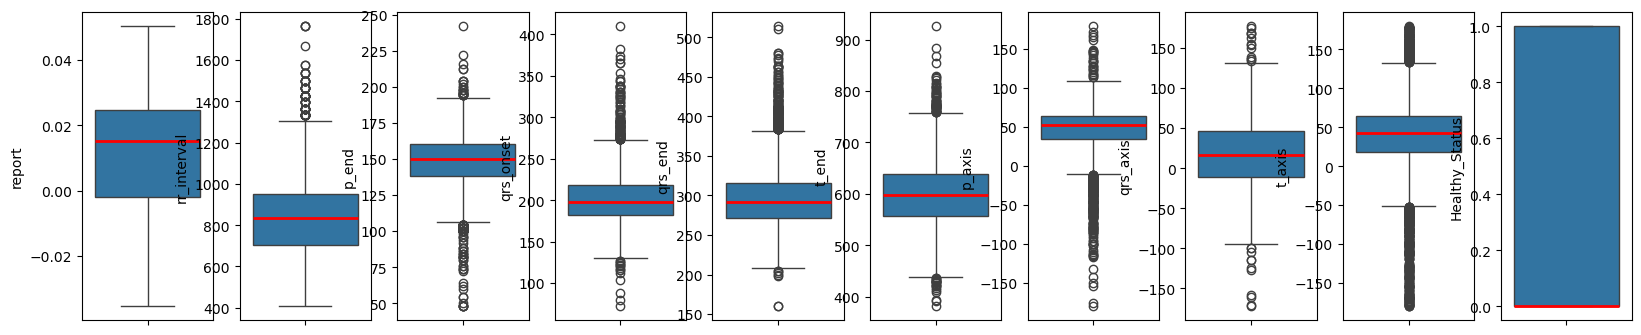

In [18]:
n = table_data.shape[1]
fig,ax = plt.subplots(1,n, figsize=(n*2,4), sharex=True)
for i in range(n):
    plt.sca(ax[i])
    col = table_data.columns[i]
    sns.boxplot(y = table_data.iloc[:,i],data=table_data, medianprops={"color": "r", "linewidth": 2})

### –ó–∞–¥–∞–Ω–∏–µ 4
–ü—Ä–æ–≤–µ–¥–∏—Ç–µ –æ—Ü–µ–Ω–∫—É –≤–∑–∞–∏–º–æ—Å–≤—è–∑–∏ –¥–∞–Ω–Ω—ã—Ö –¥–∞—Ç–∞—Å–µ—Ç–∞ —Å –ø–æ–º–æ—â—å—é —Ñ—É–Ω–∫—Ü–∏–∏ heatmap.


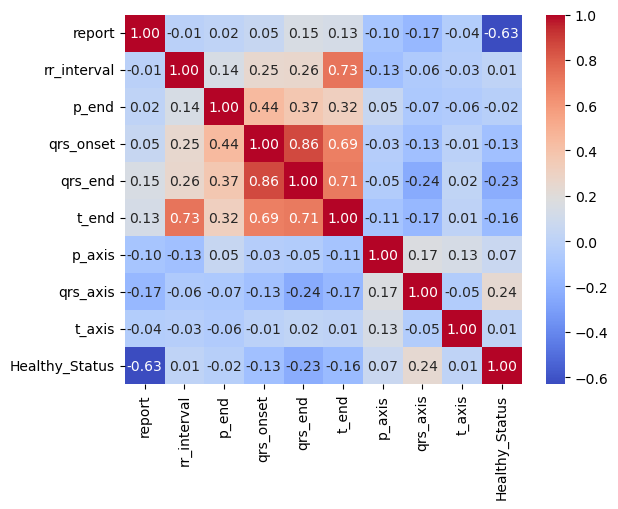

In [20]:
sns.heatmap(table_data.corr(),annot=True,fmt="0.2f",cmap="coolwarm")
plt.show()

### –ó–∞–¥–∞–Ω–∏–µ 5
–ù–∞ –æ—Å–Ω–æ–≤–µ —Ç–∞—Ä–≥–µ—Ç–∞ (—Ü–µ–ª–µ–≤–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞) Healthy_Status –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—É—é –º–∞—Ç—Ä–∏—Ü—É —Å –ø–æ–º–æ—â—å—é pairplot.


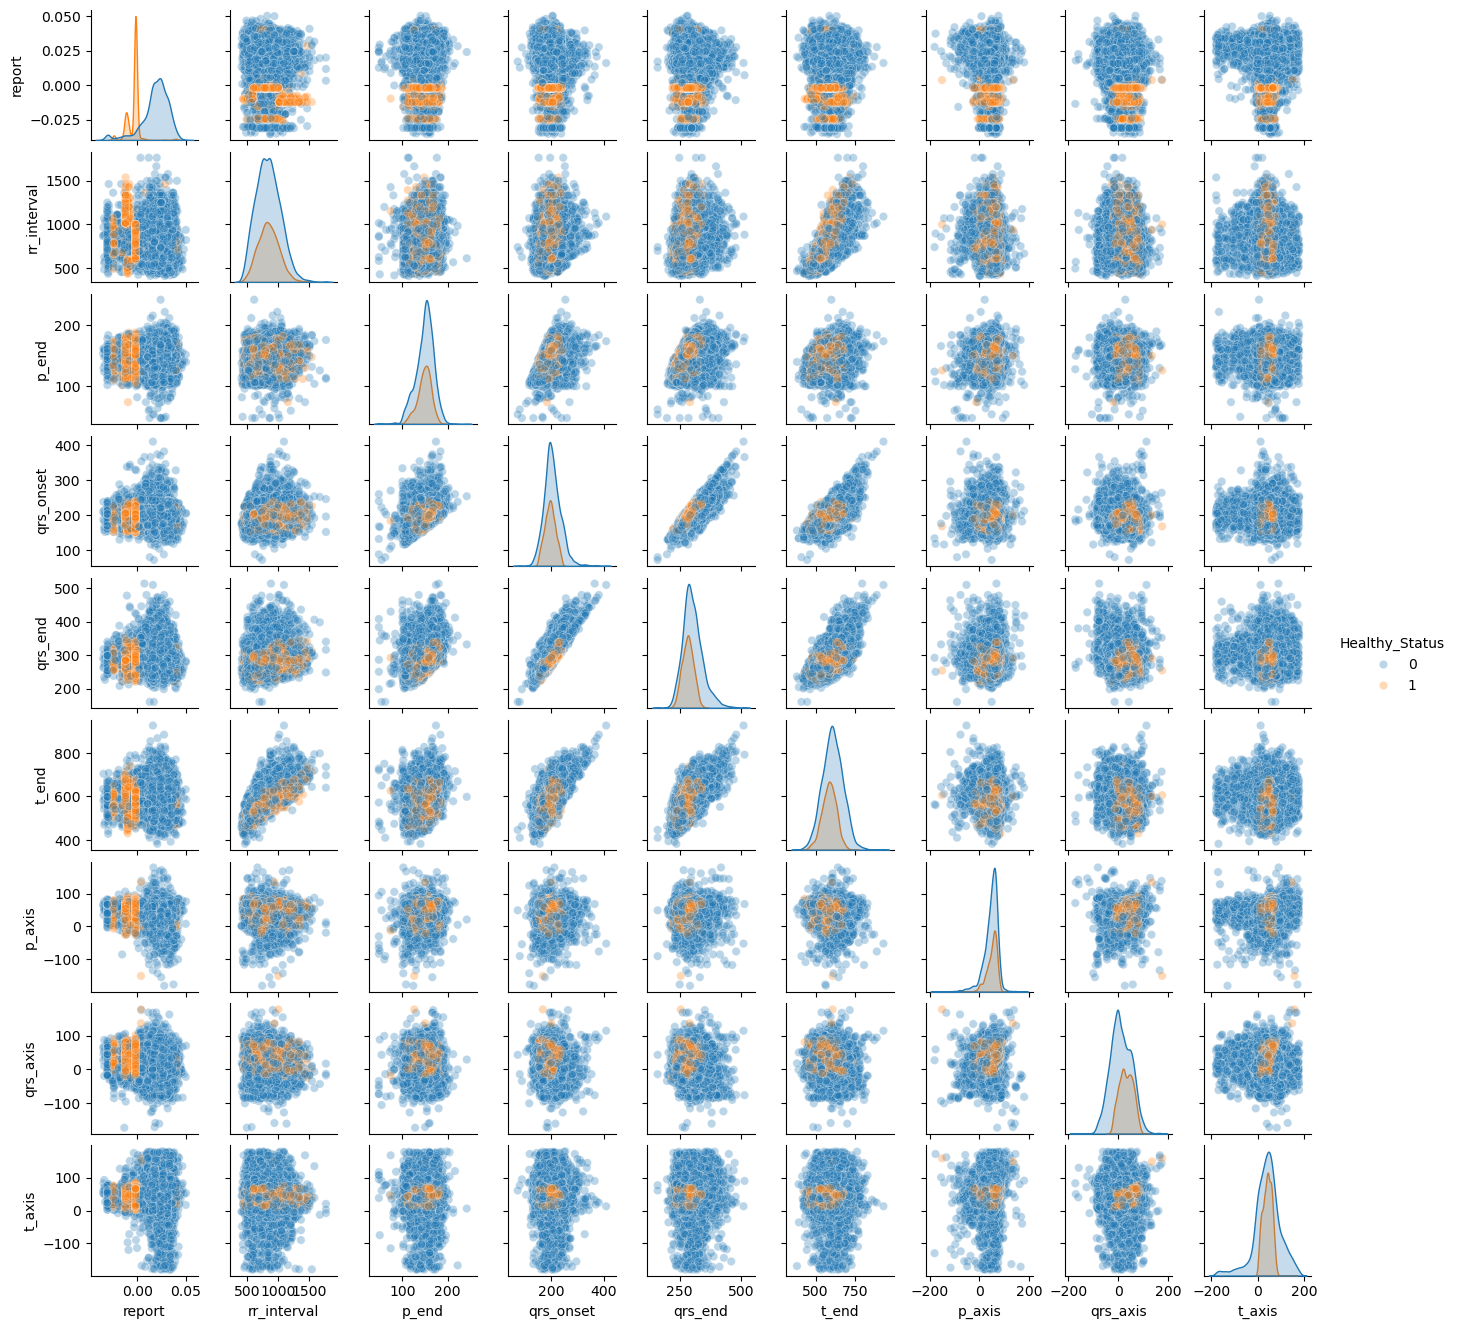

In [24]:
sns.pairplot(table_data, hue = "Healthy_Status",
             height=1.5,
             plot_kws=dict(alpha=0.3))

### –ó–∞–¥–∞–Ω–∏–µ 6
–ü—Ä–æ–≤–µ—Å—Ç–∏ —Ä–∞–∑–≤–µ–¥–æ—á–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é –º–µ—Ç–æ–¥–∞ PCA –∏ —Å –ø–æ–º–æ—â—å—é TSNE.


In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [27]:
table_data_pca = table_data
table_data_pca = table_data_pca.drop('Healthy_Status', axis = 1)
table_data_pca.columns

Index(['report', 'rr_interval', 'p_end', 'qrs_onset', 'qrs_end', 't_end',
       'p_axis', 'qrs_axis', 't_axis'],
      dtype='object')

In [28]:
scaled_data = StandardScaler().fit(table_data_pca).transform(table_data_pca)
pca = PCA(n_components = 2).fit(scaled_data)
x_pca = pca.transform(scaled_data)
print(table_data.shape, x_pca.shape)

(7046, 10) (7046, 2)


In [30]:
percent = pca.explained_variance_ratio_
print(percent)
print(sum(percent))
#To see how much variance is preserved for each dataset.

[0.34387138 0.14083298]
0.48470436389716204


In [31]:
def pca_explained(X, threshold):
  features = X.shape[1]
  for i in range(2, features):
    pca = PCA(n_components = i).fit(X)
    sum_ = pca.explained_variance_ratio_
    # add all components explained variances
    percent = sum(sum_)
    print('{} components at {:.2f}% explained variance'.format(i,percent*100))
    if percent > threshold:
      break

pca_explained(scaled_data, 0.85)

2 components at 48.47% explained variance
3 components at 61.00% explained variance
4 components at 72.52% explained variance
5 components at 82.00% explained variance
6 components at 90.11% explained variance


Text(0, 0.5, 'Second Principal Component')

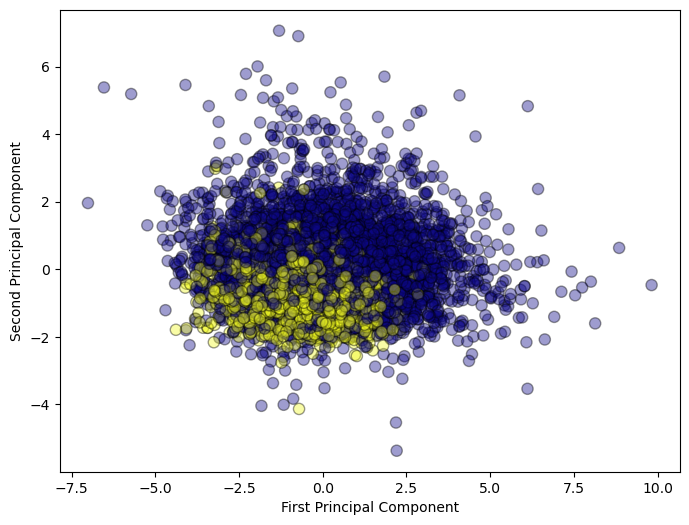

In [33]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=full_df_filtered['Healthy_Status'], cmap='plasma', alpha=0.4, edgecolors='black', s=65);
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

### –ó–∞–¥–∞–Ω–∏–µ 7
–°–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥ –æ —Å—Ç—Ä—É–∫—Ç—É—Ä–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–∞–Ω–Ω—ã—Ö

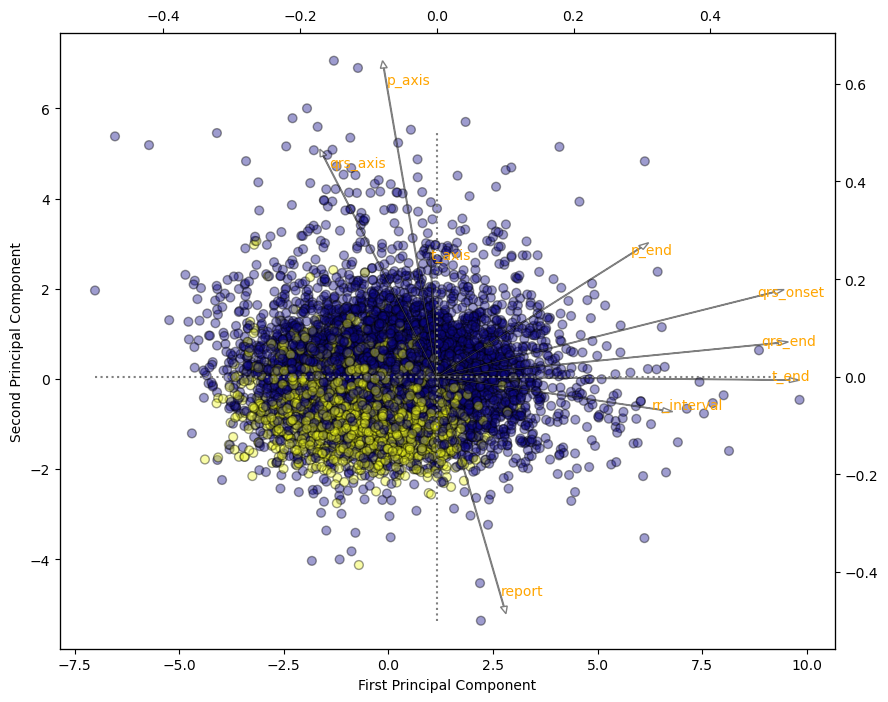

In [35]:
# put feature values into dataframe
components = pd.DataFrame(pca.components_.T, index=table_data_pca.columns, columns= ['PCA1','PCA2'])
# plot size
plt.figure(figsize=(10,8))
# main scatterplot
plt.scatter(x_pca[:,0], x_pca[:,1], c=full_df_filtered['Healthy_Status'],
            cmap='plasma', alpha=0.4, edgecolors='black', s=40);
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
#plt.ylim(15,-15);
#plt.xlim(20,-20);

# individual feature values
ax2 = plt.twinx().twiny();
#ax2.set_ylim(-0.5,0.5);
#ax2.set_xlim(-0.5,0.5);

# reference lines
ax2.hlines(0,-0.5,0.5, linestyles='dotted', colors='grey')
ax2.vlines(0,-0.5,0.5, linestyles='dotted', colors='grey')

# offset for labels
offset = 0.95
# arrow & text
for a, i in enumerate(components.index):
  ax2.arrow(0, 0, components['PCA1'][a], -components['PCA2'][a], alpha=0.5, facecolor='white', head_width=.01)
  ax2.annotate(i, (components['PCA1'][a]*offset, -components['PCA2'][a]*offset), color='orange')

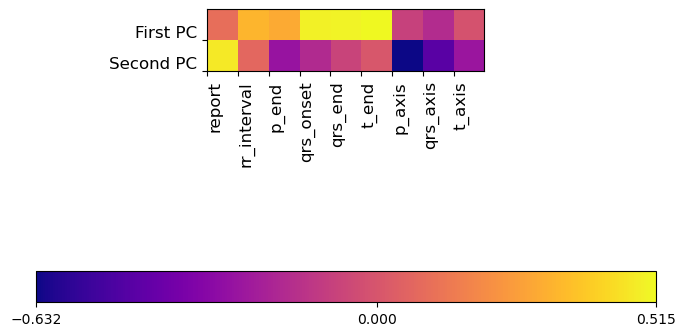

In [36]:
fig = plt.figure(figsize=(8, 4))
plt.imshow(pca.components_, interpolation = 'none', cmap = 'plasma')
feature_names = list(table_data_pca.columns)
plt.gca().set_xticks(np.arange(-.5, len(feature_names)-1));
plt.gca().set_yticks(np.arange(0.5, 2));
plt.gca().set_xticklabels(feature_names, rotation=90, ha='left',fontsize=12);
plt.gca().set_yticklabels(['First PC', 'Second PC'], va='bottom',fontsize=12);
plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0,
                                              pca.components_.max()],pad=0.65);

Text(0, 0.5, 'Second Principal Component')

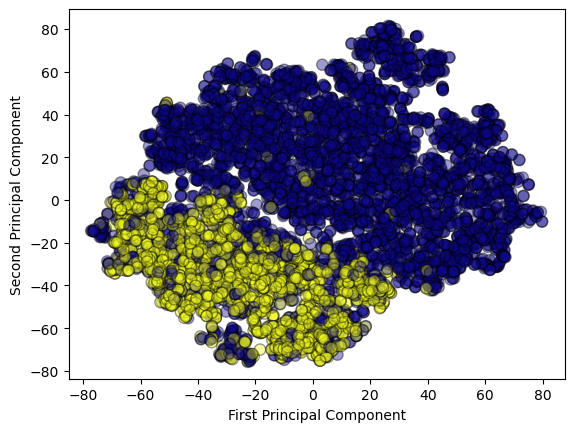

In [37]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state = 0)
scaled_data_tsne = tsne.fit_transform(scaled_data)
plt.scatter(scaled_data_tsne[:,0], scaled_data_tsne[:,1], c=full_df_filtered['Healthy_Status'], cmap='plasma', alpha=0.4, edgecolors='black', s=65);
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [38]:
from sklearn import manifold
from time import time

Time code evaluation for perplexity=1 in 6 sec
Time code evaluation for perplexity=5 in 6.1 sec
Time code evaluation for perplexity=10 in 6.8 sec
Time code evaluation for perplexity=15 in 7.2 sec
Time code evaluation for perplexity=20 in 7.7 sec
Time code evaluation for perplexity=30 in 8.8 sec
Time code evaluation for perplexity=40 in 9.8 sec
Time code evaluation for perplexity=50 in 11 sec
Time code evaluation for perplexity=100 in 13 sec


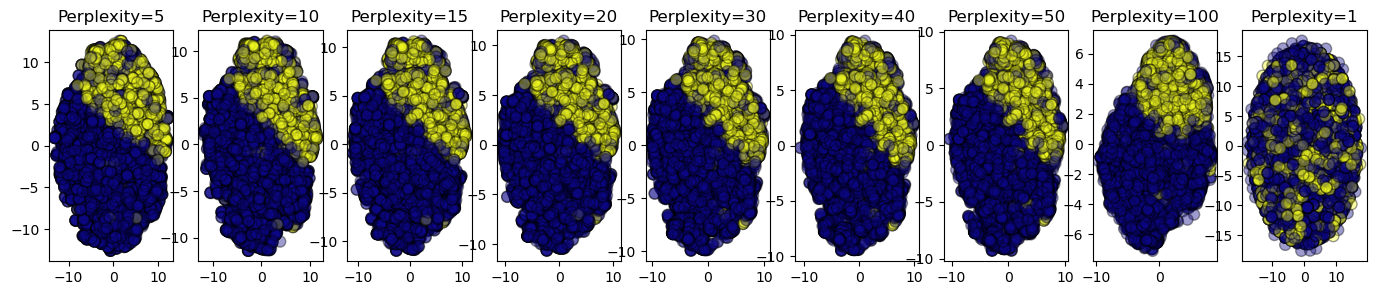

In [39]:
n_components = 2
perplexities = [1, 5, 10, 15, 20, 30, 40, 50, 100]

(fig, subplots) = plt.subplots(1, len(perplexities), figsize=(17, 3))

for i, perplexity in enumerate(perplexities):
    ax = subplots[i-1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        n_iter=300,
        )

    scaled_data_tsne = tsne.fit_transform(scaled_data)
    t1 = time()

    print("Time code evaluation for perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(scaled_data_tsne[:,0], scaled_data_tsne[:,1],
               c=full_df_filtered['Healthy_Status'],
               cmap='plasma',
               alpha=0.4,
               edgecolors='black',
               s=65
               );
    ax.axis("tight")

–ú–µ—Ç–æ–¥—ã PCA –∏ TSNE –¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä—É—é—Ç —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤, –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç, —á—Ç–æ –Ω–∞ –Ω–∞—á–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏—è—Ö perplexity —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø—Ä–∏–º–µ—Ä–Ω–æ –æ–¥–∏–Ω–∞–∫–æ–≤—ã.

### –ó–∞–¥–∞–Ω–∏–µ 8

In [42]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
table_data.columns

Index(['report', 'rr_interval', 'p_end', 'qrs_onset', 'qrs_end', 't_end',
       'p_axis', 'qrs_axis', 't_axis', 'Healthy_Status'],
      dtype='object')

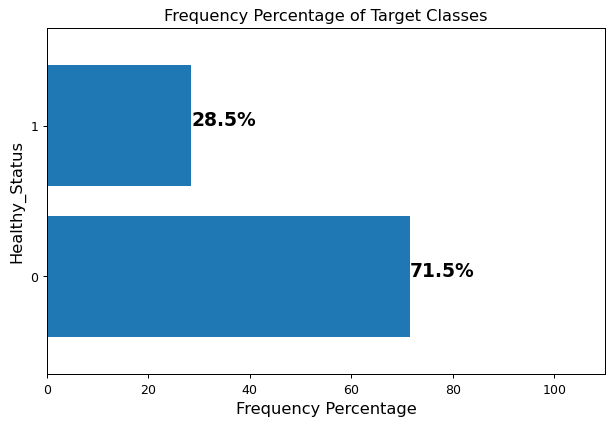

In [44]:
clf_index = 9
plt.figure(figsize=(35,20), dpi=90)
table_data[table_data.columns[clf_index]].value_counts(normalize=True).mul(100).plot(kind='barh', width=0.8, figsize=(8,5))

labels = table_data[table_data.columns[clf_index]].value_counts(normalize=True).mul(100).round(1)
for i in labels.index:
    plt.text(labels[i], i, str(labels[i])+ '%', fontsize=15, weight='bold')

plt.xlim([0, 110])
plt.xlabel('Frequency Percentage', fontsize=13)
plt.ylabel(table_data.columns[clf_index], fontsize=13)
plt.title('Frequency Percentage of Target Classes', fontsize=13)
plt.show()

–í–∏–¥–µ–Ω –¥–∏—Å–±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤, –∏–∑–±–∞–≤–∏–º—Å—è –æ—Ç –Ω–µ–≥–æ —Å –ø–æ–º–æ—â—å—é –º–µ—Ç–æ–¥–∞ SMOTE

In [46]:
from imblearn.over_sampling import SMOTE

In [47]:
target_column = 'Healthy_Status'

smote = SMOTE(random_state=0)
X_initial = table_data.drop(target_column, axis=1)
y_initial = table_data[target_column]

X, y = smote.fit_resample(X_initial, y_initial)

df = pd.DataFrame(X, columns=X_initial.columns)
df[target_column] = y

df[target_column].value_counts()

Healthy_Status
0    5039
1    5039
Name: count, dtype: int64

In [48]:
X = df.drop(df.columns[[clf_index]], axis=1).iloc[:,:]
y = pd.Series(LabelEncoder().fit_transform(df.iloc[:, clf_index]))

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.3, random_state=0, stratify=y.values)

–í–æ–∑—å–º–µ–º –∑–∞ –±–∞–∑–æ–≤—É—é –æ—Ç–º–µ—Ç–∫—É —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –º–æ–¥–µ–ª–∏ –Ω–∞–∏–≤–Ω–æ–≥–æ –≥–∞—É—Å—Å–æ–≤—Å–∫–æ–≥–æ –±–∞–π–µ—Å–æ–≤—Å–∫–æ–≥–æ –∞–ª–≥–æ—Ä–∏—Ç–º–∞

In [51]:
—Ålassifier = GaussianNB()
—Ålassifier.fit(X_train, y_train)

GaussianNB()

In [52]:
y_train__pred = —Ålassifier.predict(X_train)
y_test__pred = —Ålassifier.predict(X_test)

In [53]:
(
    f'Accuracy train data {accuracy_score(y_train, y_train__pred)}',
    f'Accuracy test data {accuracy_score(y_test, y_test__pred)}'
)

('Accuracy train data 0.9043096115679047',
 'Accuracy test data 0.9113756613756614')

In [54]:
(
    f'F1 score train data {f1_score(y_train, y_train__pred)}',
    f'F1 score test data {f1_score(y_test, y_test__pred)}'
)

('F1 score train data 0.9093838099073701',
 'F1 score test data 0.9157232704402516')

              precision    recall  f1-score   support

        True       0.96      0.86      0.91      1512
       False       0.87      0.96      0.92      1512

    accuracy                           0.91      3024
   macro avg       0.92      0.91      0.91      3024
weighted avg       0.92      0.91      0.91      3024



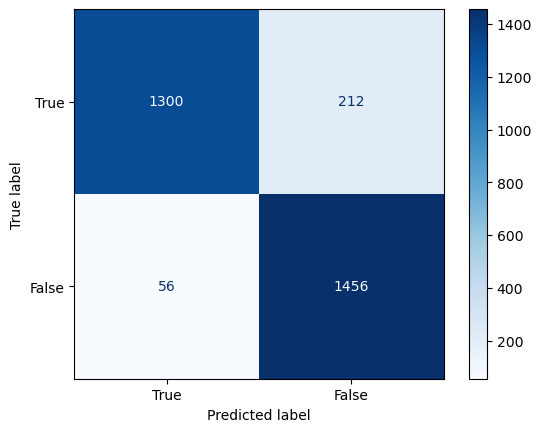

In [55]:
target_names = ['True', 'False']
labels_names = [0,1]
print(classification_report(y_test, y_test__pred, labels=labels_names, target_names=target_names))

cm = confusion_matrix(y_test, y_test__pred, labels=labels_names)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp = disp.plot(cmap=plt.cm.Blues, values_format='g')
plt.show()

# LAMA

In [57]:
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task

'nlp' extra dependency package 'transformers' isn't installed. Look at README.md in repo 'LightAutoML' for installation instructions.
'nlp' extra dependency package 'transformers' isn't installed. Look at README.md in repo 'LightAutoML' for installation instructions.


In [58]:
autoML_df = df[['report', 'rr_interval', 'p_end', 'qrs_onset', 'qrs_end', 't_end', 'p_axis', 'qrs_axis', 't_axis', 'Healthy_Status']].copy()

In [59]:
train_data, test_data = train_test_split(autoML_df, test_size=0.2, stratify=autoML_df['Healthy_Status'], random_state=42)

In [60]:
automl = TabularAutoML(
    task=Task('binary'),
    timeout=100,
    cpu_limit=4,
    reader_params={'n_jobs': 4, 'cv': 3, 'random_state': 42},
)

In [61]:
predictions = automl.fit_predict(train_data, roles={'target': 'Healthy_Status'}, verbose=0)

In [62]:
test_predictions = automl.predict(test_data).data

In [63]:
for i in range(len(test_predictions)):
    if test_predictions[i] > 0.5:
        test_predictions[i] = 1
    else:
        test_predictions[i] = 0

In [64]:
predictions_data = predictions.data
for i in range(len(predictions_data)):
    if predictions_data[i] > 0.5:
        predictions_data[i] = 1
    else:
        predictions_data[i] = 0

In [65]:
(
    f'Accuracy train data {accuracy_score(train_data["Healthy_Status"], predictions_data)}',
    f'Accuracy test data {accuracy_score(test_data["Healthy_Status"], test_predictions)}'
)

('Accuracy train data 0.9844951624906971',
 'Accuracy test data 0.9826388888888888')

In [66]:
(
    f'F1 score train data {f1_score(train_data["Healthy_Status"], predictions_data)}',
    f'F1 score test data {f1_score(test_data["Healthy_Status"], test_predictions)}'
)

('F1 score train data 0.9844662607182801',
 'F1 score test data 0.9825610363726955')

              precision    recall  f1-score   support

        True       0.98      0.99      0.98      1008
       False       0.99      0.98      0.98      1008

    accuracy                           0.98      2016
   macro avg       0.98      0.98      0.98      2016
weighted avg       0.98      0.98      0.98      2016



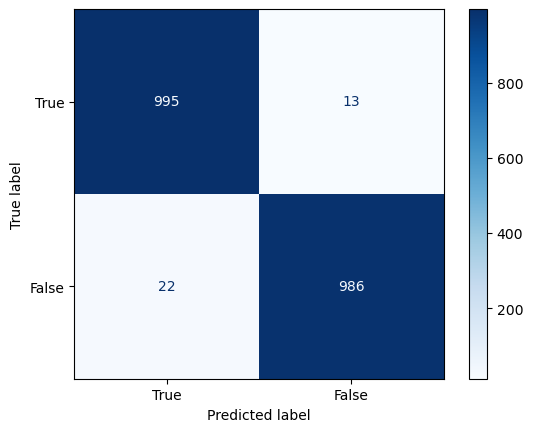

In [67]:
target_names = ['True', 'False']
labels_names = [0, 1]
print(classification_report(test_data['Healthy_Status'], test_predictions, labels=labels_names, target_names=target_names))

cm = confusion_matrix(test_data['Healthy_Status'], test_predictions, labels=labels_names)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp = disp.plot(cmap=plt.cm.Blues, values_format='g')
plt.show()

In [68]:
print(automl.create_model_str_desc())

Final prediction for new objects (level 0) = 
	 1.00000 * (3 averaged models Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM) 


In [69]:
algo = automl.levels[0][0].ml_algos[0]
model = algo.models[0]
print(f'–ê–ª–≥–æ—Ä–∏—Ç–º - {type(algo).__name__}\n–ú–æ–¥–µ–ª—å - {type(model).__name__}\n')

–ê–ª–≥–æ—Ä–∏—Ç–º - BoostLGBM
–ú–æ–¥–µ–ª—å - Booster



In [70]:
with open(f'./lightautoml_electrocardiogram_m2_model.pkl', 'wb') as f:
    pickle.dump(automl, f)

In [71]:
import subprocess
from threading import Thread

def start_mlflow():
    subprocess.run(["mlflow", "ui", "--host", "0.0.0.0", "--port", "5000"])

Thread(target=start_mlflow, daemon=True).start()

In [72]:
mlflow.set_tracking_uri(uri='http://localhost:5000')
mlflow.set_experiment('Task 2')

<Experiment: artifact_location='mlflow-artifacts:/815572667296263577', creation_time=1744220956347, experiment_id='815572667296263577', last_update_time=1744220956347, lifecycle_stage='active', name='Task 2', tags={}>

In [116]:
with mlflow.start_run(run_name='LAMA'):
    mlflow.log_params(
        {
            'n_jobs': 4, 
            'cv': 3, 
            'random_state': 42,
            'timeout': 100,
            'cpu_limit': 4,
            'algoritm': algo,
            'model': model
        }
    )
    mlflow.log_metrics(
        {
            'Accuracy train data': accuracy_score(train_data['Healthy_Status'], predictions_data),
            'Accuracy test data': accuracy_score(test_data["Healthy_Status"], test_predictions),
            'F1 score train data': f1_score(train_data["Healthy_Status"], predictions_data),
            'F1 score test data': f1_score(test_data["Healthy_Status"], test_predictions),
        }
    )
    mlflow.log_artifact('./lightautoml_electrocardiogram_m2_model.pkl')
    
    model_info = mlflow.sklearn.log_model(
        sk_model=automl,
        artifact_path='lama_model',
        signature=infer_signature(train_data, predictions_data),
        input_example=train_data,
    )

üèÉ View run LAMA at: http://localhost:5000/#/experiments/815572667296263577/runs/0aeaf39a089c42f287b4cca80f574c5b
üß™ View experiment at: http://localhost:5000/#/experiments/815572667296263577


# FEDOT

In [123]:
from fedot.api.main import Fedot

In [125]:
fedot_model = Fedot(problem='classification', timeout=3)

In [127]:
obtained_pipeline = fedot_model.fit(features=X_train, target=y_train)

2025-04-09 21:00:33,583 - Topological features operation requires extra dependencies for time series forecasting, which are not installed. It can infuence the performance. Please install it by 'pip install fedot[extra]'
2025-04-09 21:00:40,345 - ApiComposer - Initial pipeline was fitted in 5.1 sec.
2025-04-09 21:00:40,347 - ApiComposer - Taking into account n_folds=5, estimated fit time for initial assumption is 25.3 sec.
2025-04-09 21:00:40,349 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2025-04-09 21:00:40,388 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 3 min. Set of candidate models: ['bernb', 'catboost', 'dt', 'fast_ica', 'isolation_forest_class', 'knn', 'lgbm', 'logit', 'mlp', 'normalization', 'pca', 'poly_features', 'qda', 'resample', 'rf', 'scaling', 'xgboost'].
2025-04-09 21:00:40,594 - ApiComposer - Pipeline composition started.


Generations:   0%|                                                                          | 0/10000 [00:00<?, ?gen/s]

2025-04-09 21:01:05,017 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-04-09 21:02:05,359 - MultiprocessingDispatcher - 21 individuals out of 21 in previous population were evaluated successfully.
2025-04-09 21:02:05,450 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|                                                                          | 0/10000 [01:24<?, ?gen/s]


2025-04-09 21:02:05,714 - ApiComposer - Hyperparameters tuning started with 2 min. timeout
2025-04-09 21:02:11,298 - SimultaneousTuner - Initial graph: {'depth': 1, 'length': 1, 'nodes': [lgbm]}
lgbm - {'boosting_type': 'gbdt', 'max_depth': -1, 'bagging_fraction': 0.85, 'extra_trees': False, 'enable_categorical': True, 'use_eval_set': True, 'early_stopping_rounds': 30, 'n_jobs': 1, 'verbose': -1} 
Initial metric: [0.996]
  0%|                                       | 15/100000 [01:25<158:42:01,  5.71s/trial, best loss: -0.9962801895295896]
2025-04-09 21:03:44,745 - SimultaneousTuner - Final graph: {'depth': 1, 'length': 1, 'nodes': [lgbm]}
lgbm - {'boosting_type': 'gbdt', 'max_depth': -1, 'bagging_fraction': 0.85, 'extra_trees': False, 'enable_categorical': True, 'use_eval_set': True, 'early_stopping_rounds': 30, 'n_jobs': 1, 'verbose': -1}
2025-04-09 21:03:44,748 - SimultaneousTuner - Final metric: 0.996
2025-04-09 21:03:44,751 - ApiComposer - Hyperparameters tuning finished
2025-04-09

In [128]:
y_train__predict = fedot_model.predict(X_train)
y_test__predict = fedot_model.predict(X_test)

In [129]:
(
    f'Accuracy train data {accuracy_score(y_train, y_train__predict)}',
    f'Accuracy test data {accuracy_score(y_test, y_test__predict)}'
)

('Accuracy train data 0.9965976750779699',
 'Accuracy test data 0.9798280423280423')

In [130]:
(
    f'F1 score train data {f1_score(y_train, y_train__predict)}',
    f'F1 score test data {f1_score(y_test, y_test__predict)}'
)

('F1 score train data 0.9966034531559581',
 'F1 score test data 0.9798347107438017')

              precision    recall  f1-score   support

        True       0.98      0.98      0.98      1512
       False       0.98      0.98      0.98      1512

    accuracy                           0.98      3024
   macro avg       0.98      0.98      0.98      3024
weighted avg       0.98      0.98      0.98      3024



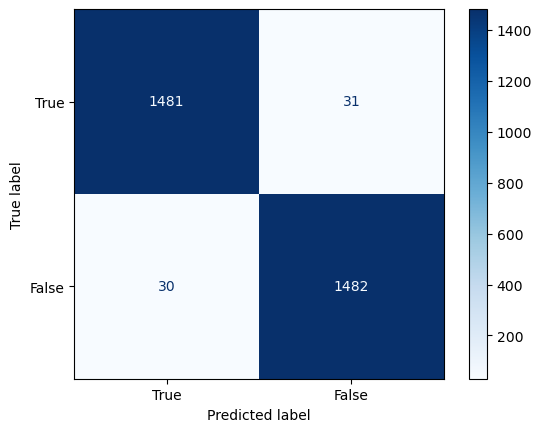

In [131]:
target_names = ['True', 'False']
labels_names = [0,1]
print(classification_report(y_test, y_test__predict, labels=labels_names, target_names=target_names))

cm = confusion_matrix(y_test, y_test__predict, labels=labels_names)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp = disp.plot(cmap=plt.cm.Blues, values_format='g')
plt.show()

In [132]:
fedot_model.current_pipeline

{'depth': 1, 'length': 1, 'nodes': [lgbm]}

In [133]:
with open(f'./fedot_model_task2.pkl', 'wb') as f:
    pickle.dump(fedot_model, f)

In [134]:
with mlflow.start_run(run_name='FEDOT'):
    mlflow.log_params(
        {
            'problem':'classification',
            'timeout': 3,
        }
    )
    mlflow.log_metrics(
        {
            'Accuracy train data': accuracy_score(y_train, y_train__predict),
            'Accuracy test data': accuracy_score(y_test, y_test__predict),
            'F1 score train data': f1_score(y_train, y_train__predict),
            'F1 score test data': f1_score(y_test, y_test__predict)
        }
    )
    mlflow.log_artifact('./fedot_model_task2.pkl')
    
    model_info = mlflow.sklearn.log_model(
        sk_model=fedot_model,
        artifact_path='model_fedot',
        signature=infer_signature(X_train, y_train__predict),
        input_example=X_train,
    )

üèÉ View run FEDOT at: http://localhost:5000/#/experiments/815572667296263577/runs/51d21c7e45354e8b8105c129a1c6f85c
üß™ View experiment at: http://localhost:5000/#/experiments/815572667296263577


# TPOT

In [144]:
from tpot import TPOTClassifier

In [146]:
X = df.iloc[:, df.columns != 'Healthy_Status'].values
y = df.iloc[:, df.columns == 'Healthy_Status'].values.reshape(-1)

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=200)

In [150]:
tpot = TPOTClassifier(generations=5, population_size=50, random_state=42, verbosity=2, max_time_mins=5)

In [152]:
tpot.fit(X_train, y_train)

Version 0.12.2 of tpot is outdated. Version 1.0.0 was released Wednesday February 26, 2025.


Optimization Progress:   0%|          | 0/50 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9730642218435696

5.04 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: XGBClassifier(RandomForestClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.7500000000000001, min_samples_leaf=2, min_samples_split=10, n_estimators=100), learning_rate=0.1, max_depth=9, min_child_weight=20, n_estimators=100, n_jobs=1, subsample=0.7500000000000001, verbosity=0)


TPOTClassifier(generations=5, max_time_mins=5, population_size=50,
               random_state=42, verbosity=2)

In [153]:
y_train__predict = tpot.predict(X_train)
y_test__predict = tpot.predict(X_test)

In [154]:
for idx, (name, transform) in enumerate(tpot.fitted_pipeline_.steps, start=1):
    print(f'{idx}. {transform}')

1. StackingEstimator(estimator=RandomForestClassifier(bootstrap=False,
                                                   criterion='entropy',
                                                   max_features=0.7500000000000001,
                                                   min_samples_leaf=2,
                                                   min_samples_split=10,
                                                   random_state=42))
2. XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
         

In [155]:
(
    f'Accuracy train data {accuracy_score(y_train, y_train__predict)}',
    f'Accuracy test data {accuracy_score(y_test, y_test__predict)}'
)

('Accuracy train data 0.9988658916926566',
 'Accuracy test data 0.9748677248677249')

In [156]:
(
    f'F1 score train data {f1_score(y_train, y_train__predict)}',
    f'F1 score test data {f1_score(y_test, y_test__predict)}'
)

('F1 score train data 0.9988655700510494',
 'F1 score test data 0.9751146037982973')

              precision    recall  f1-score   support

        True       0.98      0.97      0.97      1511
       False       0.97      0.98      0.98      1513

    accuracy                           0.97      3024
   macro avg       0.98      0.97      0.97      3024
weighted avg       0.98      0.97      0.97      3024



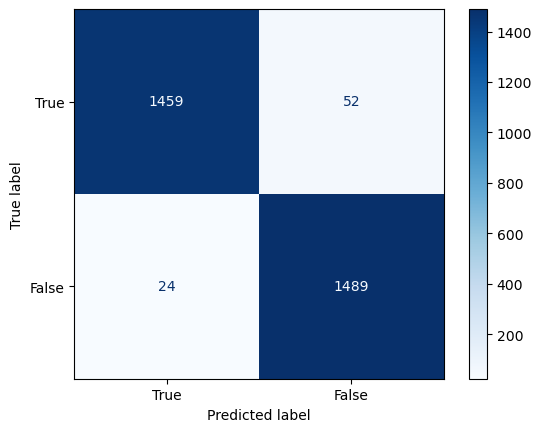

In [157]:
target_names = ['True', 'False']
labels_names = [0,1]
print(classification_report(y_test, y_test__predict, labels=labels_names, target_names=target_names))

cm = confusion_matrix(y_test, y_test__predict, labels=labels_names)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp = disp.plot(cmap=plt.cm.Blues, values_format='g')
plt.show()

In [158]:
with open('./tpot_model_task2.pkl', 'wb') as f:
    pickle.dump(tpot.fitted_pipeline_, f)

In [159]:
with mlflow.start_run(run_name='TPOT'):
    mlflow.log_params(
        {
            'generations': 5, 
            'population_size': 50, 
            'random_state': 42, 
            'verbosity': 2
        }
    )
    mlflow.log_metrics(
        {
            'Accuracy train data': accuracy_score(y_train, y_train__predict),
            'Accuracy test data': accuracy_score(y_test, y_test__predict),
            'F1 score train data': f1_score(y_train, y_train__predict),
            'F1 score test data': f1_score(y_test, y_test__predict)
        }
    )
    mlflow.log_artifact('./tpot_model_task2.pkl')
    
    model_info = mlflow.sklearn.log_model(
        sk_model=tpot.fitted_pipeline_,
        artifact_path='tpot_model',
        signature=infer_signature(X_train, y_train__predict),
        input_example=X_train,
    )

üèÉ View run TPOT at: http://localhost:5000/#/experiments/815572667296263577/runs/968b7e2420a34bd0896fd88ec2eb21e2
üß™ View experiment at: http://localhost:5000/#/experiments/815572667296263577
